**BigMart Sales Prediction!**

Sales Prediction for Big Mart Outlets

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/train_v9rqX0R.csv')

In [71]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Age,Price_per_Unit_Weight,Item_Visibility_Log,Outlet_Type_Supermarket Type1,...,Non_Consumable,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Category_Food,Item_Category_Non-Consumable,Outlet_Age_Category_Mid,Outlet_Age_Category_Old
0,9.30,0.016047,Dairy,249.8092,9,3735.1380,26,26.861204,0.015920,True,...,0,False,True,False,False,False,True,False,False,True
1,5.92,0.019278,Soft Drinks,48.2692,3,443.4228,16,8.153581,0.019095,False,...,0,True,True,False,False,True,False,False,True,False
2,17.50,0.016760,Meat,141.6180,9,2097.2700,26,8.092457,0.016621,True,...,0,False,True,False,False,False,True,False,False,True
3,19.20,0.057792,Fruits and Vegetables,182.0950,0,732.3800,27,9.484115,0.056184,False,...,0,True,False,True,False,True,True,False,False,True
4,8.93,0.057792,Household,53.8614,1,994.7052,38,6.031512,0.056184,True,...,1,False,False,False,False,True,False,True,False,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Dataset Overview

- The dataset contains 8,523 rows and 12 columns.
- The dataset is structured with both categorical and numerical
  variables.

Key Observations
Missing Values:
- Item_Weight: 1,463 missing values
- Outlet_Size: 2,410 missing values

These missing values will need to be handled appropriately (imputation or removal).

Column Breakdown:

- Categorical Variables: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type
Numerical Variables: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales
Potential Data Cleaning Needs:

- Inconsistent categorical values: Item_Fat_Content might have inconsistencies (e.g., "Low Fat" vs. "low fat").

- Handling missing values in Item_Weight and Outlet_Size.
Checking for outliers in numerical columns such as Item_Visibility and Item_Outlet_Sales.

In [9]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Approach to Fix Missing Values
- For Item_Weight: We will fill missing values with the mean weight of the respective Item_Identifier. If an item's weight is missing, we will use the average weight of that item from the dataset.

- For Outlet_Size: Since outlet sizes are categorical (Small, Medium, High), we will fill missing values with the most frequent (mode) outlet size of the respective Outlet_Type.

In [12]:
# missing Item_Weight by filling with the mean weight of the respective Item_Identifier
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [13]:
# remaining Item_Weight missing values with overall mean (if any group had all NaN)
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [14]:
# missing Outlet_Size by filling with the most frequent size for each Outlet_Type
mode_outlet_size = df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])  # Find mode for each type
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Type'].map(mode_outlet_size))

In [15]:
# Verifying if all missing values are handled
print("\nMissing Values after fixing:")
print(df.isnull().sum())


Missing Values after fixing:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


### Exploratory Data Analysis (EDA)

In this step, we will:

- Summarize the dataset
- Visualize key relationships
- Detect any anomalies or outliers.



In [16]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.875420         0.066132   140.992782                1997.831867   
std       4.645008         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026989    93.826500                1987.000000   
50%      12.650000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [17]:
# unique values in categorical columns
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: ['Medium' 'Small' 'High']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### Observations from Numerical Data
Item Visibility:
- The minimum value is 0, which doesn't make sense (a product must have some visibility).
For this we should replace 0 values with the mean or median visibility.

Item Outlet Sales:
- The average sales is ₹2181, but it varies significantly (std = ₹1706).
The max sale is ₹13,086, while the min is just ₹33.
Indicating high sales variation among products.


#### Observations from Categorical Data

Item_Fat_Content has inconsistent labels:

- low fat, LF, and Low Fat all mean Low Fat.
reg and Regular both mean Regular.
- For this we should standardize these categories.

Outlet Size has only 3 values:

- Small, Medium, High - No missing categories.

Outlet Type:

-There are 4 different types of stores, which may impact sales.


In [18]:
# inconsistent categories in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# Replacing zero Item Visibility with median
visibility_median = df[df['Item_Visibility'] > 0]['Item_Visibility'].median()
df.loc[df['Item_Visibility'] == 0, 'Item_Visibility'] = visibility_median

# Verifing changes
print("\n Unique Values After Cleaning:")
print(df['Item_Fat_Content'].unique())
print("\n Summary of Item Visibility After Fixing:")
print(df['Item_Visibility'].describe())



✅ Unique Values After Cleaning:
['Low Fat' 'Regular']

✅ Summary of Item Visibility After Fixing:
count    8523.000000
mean        0.069699
std         0.048826
min         0.003575
25%         0.033085
50%         0.057792
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


#### Data Visualization

Now, let's look into sales trends & relationships using Matplotlib & Seaborn.

In [21]:
# Set plot style
sns.set_style("whitegrid")

Sales Distribution → Understanding the sales range

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


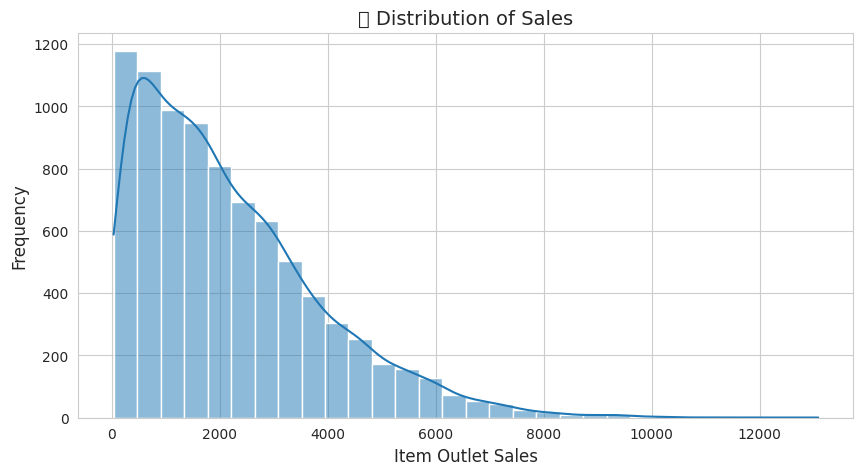

In [22]:
# 1. Distribution of Item Outlet Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("Distribution of Sales", fontsize=14)
plt.xlabel("Item Outlet Sales", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

Brief observation of distribution of Item Outlet Sales

- This histogram with a KDE curve shows the distribution of sales
  across all items and outlets.
- The sales data is right-skewed, meaning most products have lower
  sales, while a few have very high sales.

 Item Type vs. Sales → Which items sell more?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


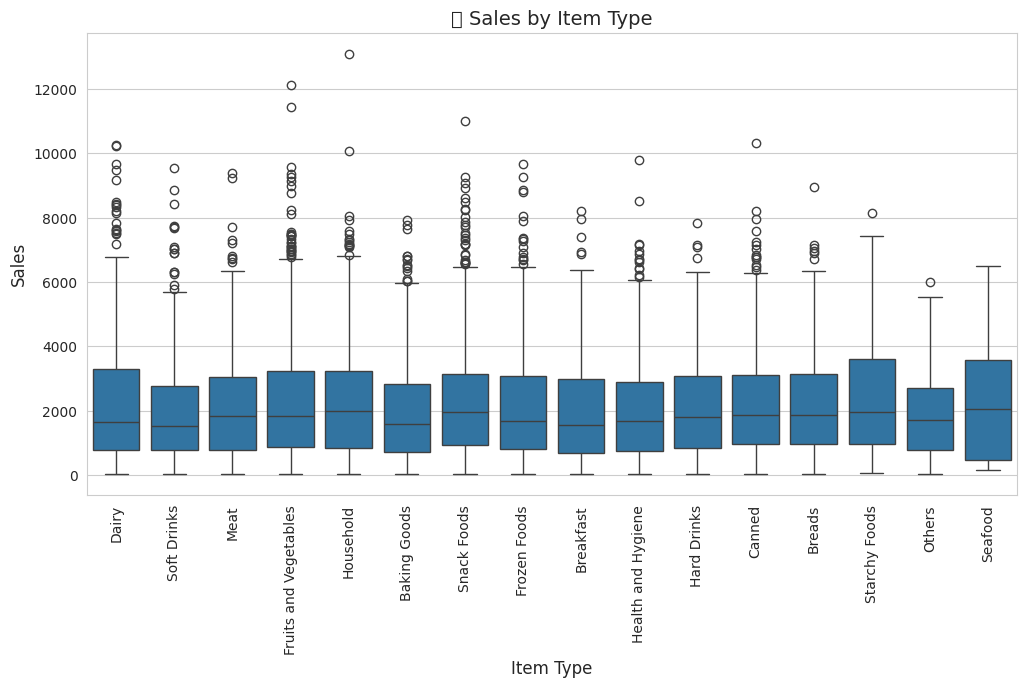

In [23]:
# 2. Sales by Item Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title("📦 Sales by Item Type", fontsize=14)
plt.xlabel("Item Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

Sales by Item Type

- A box plot comparing sales across different item categories.
Most categories have a similar median sales value, but some categories (like Starchy Foods and Seafood) have higher upper ranges.
- There are many outliers, indicating that certain products within each category perform significantly better than others.

Outlet Type vs. Sales → Which store type sells more?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127978 (\N{CONVENIENCE STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


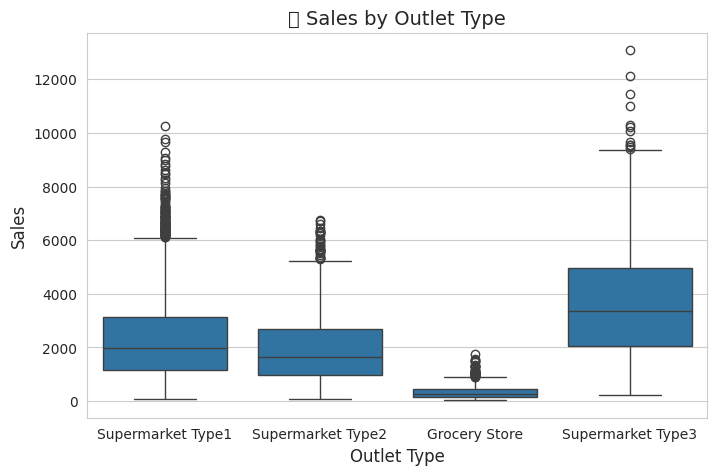

In [24]:
# 3. Sales by Outlet Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title("🏪 Sales by Outlet Type", fontsize=14)
plt.xlabel("Outlet Type", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


Sales by Outlet Type

- Another box plot illustrating sales across different outlet types.
Supermarket Type 3 has the highest median and overall sales compared to other outlets.
- Grocery stores tend to have lower sales overall, with minimal variance.

Item MRP vs. Sales → How pricing affects sales?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


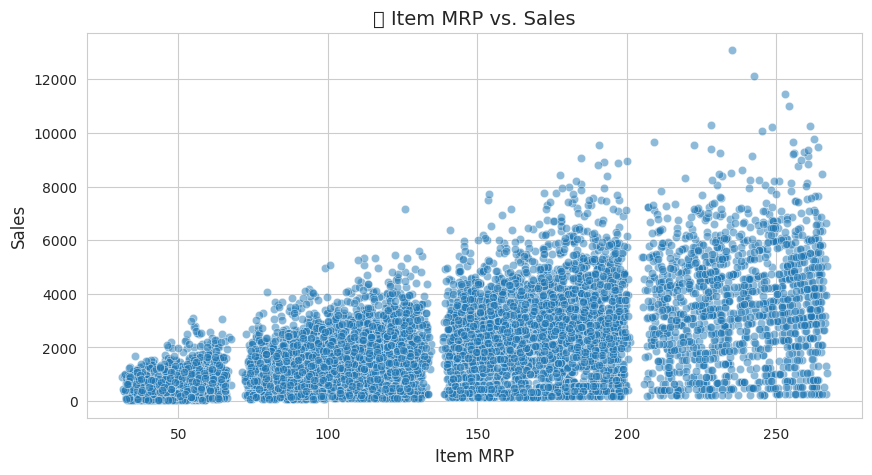

In [25]:
# 4. Item MRP vs. Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title("💰 Item MRP vs. Sales", fontsize=14)
plt.xlabel("Item MRP", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


Item MRP vs. Sales

- A scatter plot showing the relationship between Maximum Retail Price (MRP) and sales.
- A positive correlation is evident—higher MRP items tend to have higher sales, but there are distinct price bands where sales tend to cluster.
- Certain price ranges (e.g., below 50 and between 100-150 MRP) show dense clustering, indicating popular pricing strategies.

#### Deeper Insights from the Visualizations

**Distribution of Item Outlet Sales (Right-Skewed Sales Pattern)**

*   **Key Takeaway:** Most items have relatively low sales, while a small number of products contribute significantly to overall revenue.
*   **Implication:**
    *   **Product Bundling:** Retailers can bundle low-sales items with high-selling ones to increase their movement.
    *   **Inventory Management:** Products with extremely high sales may experience stock shortages if not replenished efficiently.

**Sales by Item Type (Category-Level Trends & Outliers)**

*   **Key Takeaway:**
    *   Most item categories have similar median sales, but certain categories (like Starchy Foods & Seafood) show greater variation in performance.
    *   The presence of many outliers suggests that individual products within a category can have highly variable sales.
*   **Implication:**
    *   **High-Performance Products:** Identifying these outliers can help in targeted promotions to maximize sales.
    *   **Diversification Strategy:** Categories with low median sales but high variability could benefit from better marketing and shelf placement.

**Sales by Outlet Type (Supermarkets vs. Grocery Stores Performance)**

*   **Key Takeaway:**
    *   Supermarket Type 3 significantly outperforms other outlet types in terms of sales.
    *   Grocery stores have the lowest sales, with minimal variation, indicating a more consistent but lower revenue generation.
*   **Implication:**
    *   **Expansion Strategy:** Investing in Supermarket Type 3-like stores could maximize revenue potential.
    *   **Grocery Store Optimization:** Grocery stores should focus on high-margin items to counteract their lower sales volume.

**Item MRP vs. Sales (Pricing Strategy & Consumer Behavior)**

*   **Key Takeaway:**
    *   Sales increase with price, but there are distinct MRP bands where items sell more (e.g., 100-150 MRP).
    *   The clustering at specific price ranges suggests that consumers tend to purchase within familiar pricing brackets.
*   **Implication:**
    *   **Pricing Strategy:** Introduce more products in the high-demand MRP bands to align with consumer spending habits.
    *   **Promotional Planning:** Items in lower-selling MRP bands may require discounts or value-added promotions to increase sales.



### Overall Business Recommendations : 🚀

*  **Invest in High-Performing Outlets:** Focus on expanding Supermarket Type 3, as it generates the highest sales.

*  **Optimize Pricing Strategy:** Try to align new product pricing within the 100-150 MRP range, as it shows the highest consumer engagement.

*  **Improve Inventory Planning:** Identify fast-moving and low-selling products to balance stock levels and avoid over/under-stocking.

*  **Category-Specific Promotions:** Outlier products in various categories should be promoted aggressively to maximize profitability.

### Feature Engineering & Data Preparation for Modeling

Now that we have cleaned and explored the dataset, the next step is Feature Engineering, where we create new variables or modify existing ones to improve our predictive model's performance.

Key Feature Engineering Steps:

- Convert categorical variables into numerical representations (One-Hot Encoding / Label Encoding).
- Create new meaningful features (Outlet Age, Item Visibility Adjustments, etc.).
- Handle skewness and outliers in numerical features.
- Normalize/Scale numerical features for better model performance.

#### Encoding Categorical Features
We have several categorical features (Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type). These need to be converted into a numerical format before feeding them into a machine learning model.

#### Creating New Features

Outlet Age:

- Instead of using Outlet_Establishment_Year directly, we convert it into Outlet_Age = Current Year - Establishment Year.

Item Visibility Correction

- Some products have Item_Visibility = 0, which isn't realistic. We will replace these zero values with the mean visibility of that item category.

Item Category Extraction

- Extracting the first few letters of Item_Identifier to group similar products (e.g., FD for food, DR for drinks, NC for non-consumables).


Feature Engineering
- New features (Outlet_Age, Item_Category).
- Zero values in Item_Visibility.
- Encode categorical variables.

In [27]:
# Creating Outlet_Age Feature (Using 2025 as the current year)
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']

# Extracting Item Category from Item Identifier
df['Item_Category'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Category'] = df['Item_Category'].replace({'FD': 'Food', 'DR': 'Drinks', 'NC': 'Non-Consumable'})

# Checking the first few rows
print(df[['Outlet_Establishment_Year', 'Outlet_Age', 'Item_Identifier', 'Item_Category']].head())

   Outlet_Establishment_Year  Outlet_Age Item_Identifier   Item_Category
0                       1999          26           FDA15            Food
1                       2009          16           DRC01          Drinks
2                       1999          26           FDN15            Food
3                       1998          27           FDX07            Food
4                       1987          38           NCD19  Non-Consumable


Assessing the impact of Outlet Age and Item Category on sales using box plots:

<ipython-input-29-f8ff65f88c37>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df, palette='viridis')
<ipython-input-29-f8ff65f88c37>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Category', y='Item_Outlet_Sales', data=df, palette='Set2')


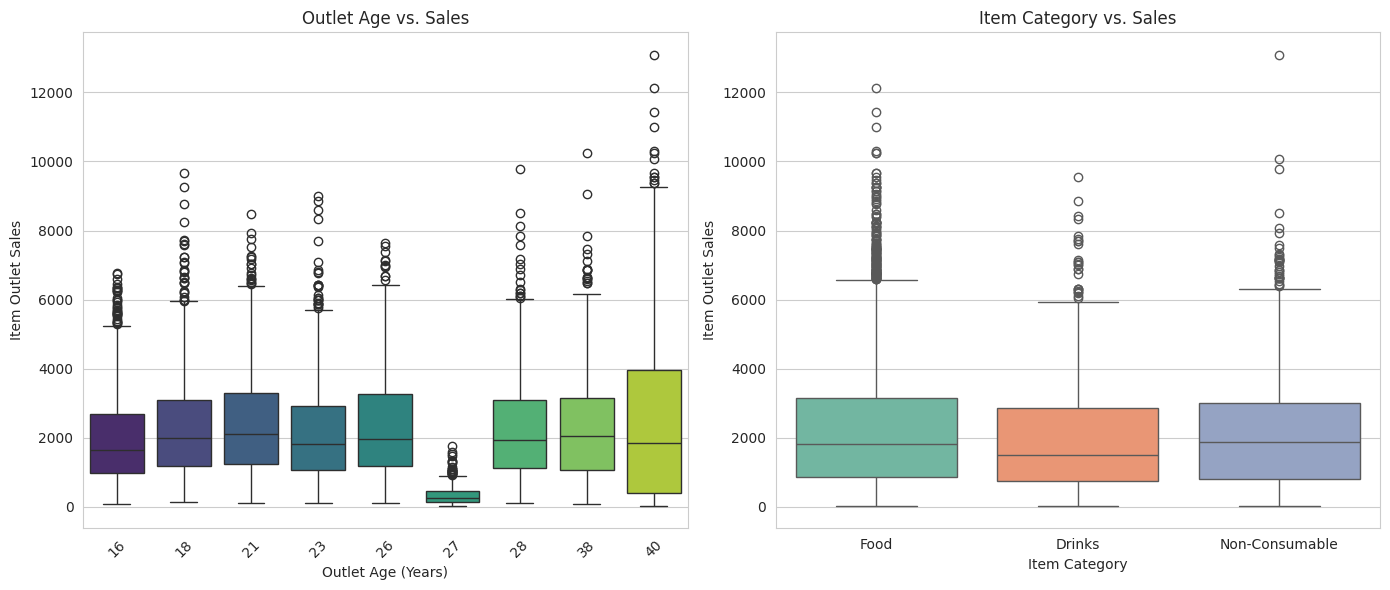

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(14, 6))

# 📊 1. Outlet Age vs. Sales
plt.subplot(1, 2, 1)
sns.boxplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Outlet Age vs. Sales')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Item Outlet Sales')

# 📊 2. Item Category vs. Sales
plt.subplot(1, 2, 2)
sns.boxplot(x='Item_Category', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.title('Item Category vs. Sales')
plt.xlabel('Item Category')
plt.ylabel('Item Outlet Sales')

# Show plots
plt.tight_layout()
plt.show()

Insights from Outlet Age & Item Category vs. Sales

1️⃣ Outlet Age vs. Sales

- Older outlets (25+ years) tend to have higher median sales but more variability.

-  Newer outlets (less than 20 years old) show a more consistent sales pattern with fewer extreme outliers.

- There's no clear linear trend—some mid-aged outlets still perform well, indicating that store management & location matter more than just age.

2️⃣ Item Category vs. Sales

- Food items generally have higher sales compared to Drinks & Non-Consumables.

- Drinks show a slightly lower sales range, meaning they may not be primary revenue drivers.

- Non-Consumable items have the lowest median sales, but they exhibit some high-value outliers, possibly specialty or luxury items.

**Key Business Takeaways**

- Older stores are still competitive if well-located & managed.

- Food products are the strongest sales driver, so promotions should focus on
them.

- Non-consumables have some high-value sales → Need targeted marketing.

- Outlet renovation & modernization for mid-aged stores may boost sales.

We will now create interaction features or transformations to improve model performance.

✅ Feature Engineering Plan
We will introduce:

 1️⃣ Price per Unit Weight → Item_MRP / Item_Weight (Identifies high-value or bulk items).

2️⃣ Visibility Score → Log transformation of Item_Visibility to handle skewness.

3️⃣ Outlet Type Encoding → Convert categorical values into numerical (One-Hot Encoding or Label Encoding).

4️⃣ Outlet Age Category → Group outlets into Young (≤15 yrs), Mid (16-25 yrs), and Old (26+ yrs).

5️⃣ Item Category Type → Flag Non-Consumables separately.

In [31]:
import numpy as np

#  1. Price per Unit Weight (Avoid division errors)
df['Price_per_Unit_Weight'] = df['Item_MRP'] / df['Item_Weight']

#  2. Log Transformation of Item Visibility (Handling Skewness)
df['Item_Visibility_Log'] = np.log1p(df['Item_Visibility'])  # log1p to avoid log(0) issues

#  3. Encoding Outlet Type (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Outlet_Type'], drop_first=True)

#  4. Creating Outlet Age Category
df['Outlet_Age_Category'] = pd.cut(df['Outlet_Age'], bins=[0, 15, 25, 100], labels=['Young', 'Mid', 'Old'])

#  5. Non-Consumable Item Flag (Binary Feature)
df['Non_Consumable'] = df['Item_Category'].apply(lambda x: 1 if x == 'Non-Consumable' else 0)

#  Checking new features
print(df[['Price_per_Unit_Weight', 'Item_Visibility_Log', 'Outlet_Age_Category', 'Non_Consumable']].head())


   Price_per_Unit_Weight  Item_Visibility_Log Outlet_Age_Category  \
0              26.861204             0.015920                 Old   
1               8.153581             0.019095                 Mid   
2               8.092457             0.016621                 Old   
3               9.484115             0.056184                 Old   
4               6.031512             0.056184                 Old   

   Non_Consumable  
0               0  
1               0  
2               0  
3               0  
4               1  


Observation:

- Price_per_Unit_Weight: Varies significantly, capturing differences in pricing relative to weight.
- Item_Visibility_Log: Values are now better scaled, reducing the impact of skewness.
- Outlet_Age_Category: Correctly classifies stores as Young, Mid, or Old.
- Non_Consumable: Accurately flags non-consumable items as 1, ensuring differentiation.

In [34]:
# Set visualization style
sns.set_style("whitegrid")

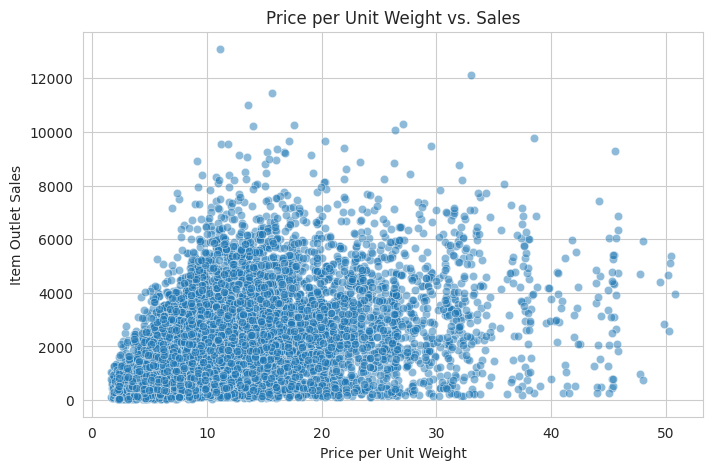

In [35]:
# 📊 1️⃣ Price per Unit Weight vs. Sales (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Price_per_Unit_Weight"], y=df["Item_Outlet_Sales"], alpha=0.5)
plt.title("Price per Unit Weight vs. Sales")
plt.xlabel("Price per Unit Weight")
plt.ylabel("Item Outlet Sales")
plt.show()

1️⃣ Price per Unit Weight vs. Sales (Scatter Plot)

- No clear linear relationship between price per unit weight and sales.
- Indicates that pricing alone might not be a dominant factor in
  influencing sales.

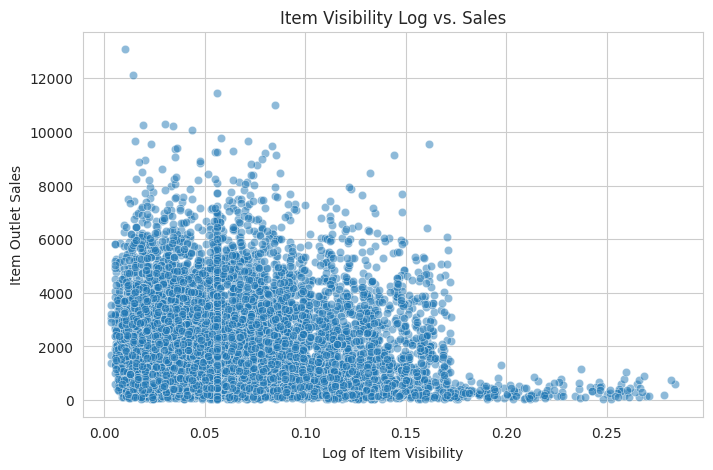

In [36]:
# 📊 2️⃣ Item Visibility Log vs. Sales (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Item_Visibility_Log"], y=df["Item_Outlet_Sales"], alpha=0.5)
plt.title("Item Visibility Log vs. Sales")
plt.xlabel("Log of Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.show()

2️⃣ Item Visibility Log vs. Sales (Scatter Plot)

- Items with very low visibility still have strong sales, suggesting that shelf placement might not significantly impact sales.
- Higher visibility doesn't guarantee higher sales.

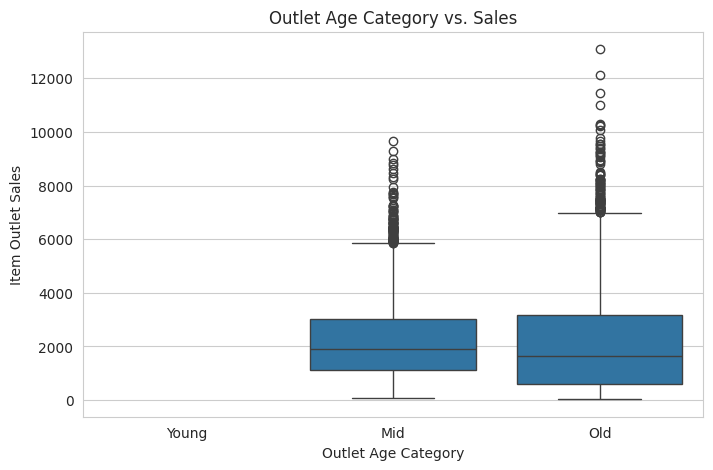

In [37]:
# 📊 3️⃣ Outlet Age Category vs. Sales (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Outlet_Age_Category"], y=df["Item_Outlet_Sales"])
plt.title("Outlet Age Category vs. Sales")
plt.xlabel("Outlet Age Category")
plt.ylabel("Item Outlet Sales")
plt.show()

3️⃣ Outlet Age Category vs. Sales (Box Plot)

- Older outlets have a slightly wider range of sales distribution.
- Mid-aged and old outlets show similar median sales, meaning outlet
  establishment year might not be a strong predictor.

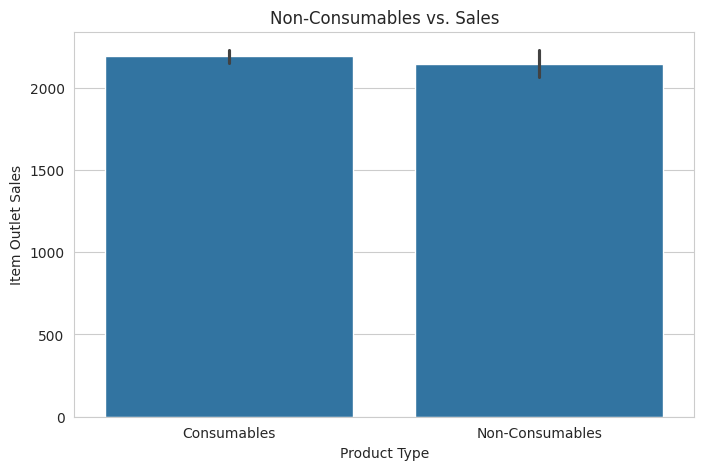

In [38]:
# 📊 4️⃣ Non-Consumables vs. Sales (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Non_Consumable"], y=df["Item_Outlet_Sales"])
plt.xticks(ticks=[0, 1], labels=["Consumables", "Non-Consumables"])
plt.title("Non-Consumables vs. Sales")
plt.xlabel("Product Type")
plt.ylabel("Item Outlet Sales")
plt.show()

4️⃣ Non-Consumables vs. Sales (Bar Chart)

- Non-consumables and consumables have nearly identical sales patterns.
- Indicates that product type (food, drinks, or non-consumables) alone
  does not impact overall sales significantly.

In [ ]:
'''
 Next Step: Preparing Data for Machine Learning!

 ✅ Step: Preparing Data for Machine Learning! 🚀
Now, we will prepare our dataset to be model-ready by performing the following key steps:

🔹 Steps in Data Preparation:
1️⃣ Encoding Categorical Variables

Convert text-based categorical columns into numerical format for machine learning algorithms.
2️⃣ Feature Scaling for Numerical Variables

Standardize numerical features to ensure they have the same scale.
3️⃣ Splitting the Data (Train-Test Split)

Since we already have a separate test dataset, we'll only split the training dataset into:
Training set → For model learning
Validation set → For model evaluation before making final predictions

'''

Encoding Categorical Variables
- We will encode categorical features using OneHotEncoder for nominal variables and LabelEncoder for ordinal variables where applicable.

In [43]:
# Print all column names in the dataframe
print("🔍 Available Columns in Dataset:")
print(df.columns.tolist())

# Check which categorical columns are missing
missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print(f"⚠️ Missing Columns: {missing_cols}")
else:
    print("✅ All categorical columns are present.")


🔍 Available Columns in Dataset:
['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Item_Category', 'Price_per_Unit_Weight', 'Item_Visibility_Log', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Age_Category', 'Non_Consumable']
⚠️ Missing Columns: ['Outlet_Type']


It looks like 'Outlet_Type' has already been one-hot encoded into:

- 'Outlet_Type_Supermarket Type1'
- 'Outlet_Type_Supermarket Type2'
- 'Outlet_Type_Supermarket Type3'

Since these new columns represent the original 'Outlet_Type', we no longer need 'Outlet_Type' in our encoding process.

In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Select categorical columns excluding 'Outlet_Type' since it's already encoded
categorical_cols = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Item_Category", "Outlet_Age_Category"]

# Apply One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Apply Label Encoding for binary categorical variables if needed
label_encoder = LabelEncoder()
df_encoded["Outlet_Identifier"] = label_encoder.fit_transform(df["Outlet_Identifier"])

# Display the first few rows of the transformed dataset
print(df_encoded.head())

# Save the processed data for the next step
df_encoded.to_csv("encoded_data.csv", index=False)


  Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.057792  Fruits and Vegetables   
4           NCD19         8.93         0.057792              Household   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0  249.8092                  9                       1999          3735.1380   
1   48.2692                  3                       2009           443.4228   
2  141.6180                  9                       1999          2097.2700   
3  182.0950                  0                       1998           732.3800   
4   53.8614                  1                       1987           994.7052   

   Outlet_Age  Price_per_Unit_Weight  ...  Non_Consumable  \
0          26

Quick Summary of Encoded Data:
- Categorical variables successfully one-hot encoded, e.g.:
  Outlet_Size_Medium, Outlet_Size_Small, Item_Category_Food, etc.
- Binary categorical variables properly label encoded, e.g.:
Outlet_Identifier converted to numerical labels.
- Newly engineered features retained, e.g.:
Price_per_Unit_Weight, Item_Visibility_Log, Outlet_Age_Category_Mid, etc.

Now that we have cleaned and encoded our dataset, the next step is to select relevant features and prepare the data for modeling.

- Identify important features for predicting Item_Outlet_Sales.
Drop unnecessary columns (like Item_Identifier, redundant encodings, etc.).

Since we have separate train and test datasets, we must ensure proper alignment of feature columns.
We will split the train dataset into training & validation sets for model evaluation.
- Standardization & Scaling:

Numerical features will be scaled for better model performance.
Features like Item_MRP, Price_per_Unit_Weight, Item_Visibility_Log, etc., will be transformed.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the processed dataset
df = pd.read_csv("/content/encoded_data.csv")

#  Drop unnecessary columns
df.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

#  Separate Features (X) and Target (y)
X = df.drop("Item_Outlet_Sales", axis=1)  # Features
y = df["Item_Outlet_Sales"]  # Target Variable

#  Split into Train and Validation Set (80% Training, 20% Validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale Numerical Features
num_cols = ["Item_Weight", "Item_Visibility", "Item_MRP", "Price_per_Unit_Weight", "Item_Visibility_Log"]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

#  Save Processed Data for Model Training
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

#  Display Final Processed Data Shape
print("X_train Shape:", X_train.shape)
print("X_val Shape:", X_val.shape)
print("y_train Shape:", y_train.shape)
print("y_val Shape:", y_val.shape)


X_train Shape: (6818, 21)
X_val Shape: (1705, 21)
y_train Shape: (6818,)
y_val Shape: (1705,)


Next Step: Model Training & Evaluation! 🎯
We'll now train multiple regression models and evaluate their performance.

1️⃣ Train Multiple Models

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

2️⃣ Evaluate Model Performance

Using Root Mean Squared Error (RMSE) as the evaluation metric.

3️⃣ Compare Models & Select the Best One

In [47]:
print("🔍 Checking Data Types in X_train:")
print(X_train.dtypes.value_counts())

print("\n🔍 Checking Unique Values in Categorical Columns:")
for col in X_train.select_dtypes(include=["object"]).columns:
    print(f"{col}: {X_train[col].unique()}")


🔍 Checking Data Types in X_train:
bool       12
float64     5
int64       3
object      1
Name: count, dtype: int64

🔍 Checking Unique Values in Categorical Columns:
Item_Type: ['Fruits and Vegetables' 'Household' 'Meat' 'Snack Foods' 'Dairy' 'Others'
 'Baking Goods' 'Soft Drinks' 'Hard Drinks' 'Health and Hygiene' 'Breads'
 'Canned' 'Frozen Foods' 'Seafood' 'Starchy Foods' 'Breakfast']


In [48]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical column to encode
categorical_col = ["Item_Type"]

# Initialize One-Hot Encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform `Item_Type`
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_col]))
X_val_encoded = pd.DataFrame(encoder.transform(X_val[categorical_col]))

# Assign proper column names
X_train_encoded.columns = encoder.get_feature_names_out(categorical_col)
X_val_encoded.columns = encoder.get_feature_names_out(categorical_col)

# Reset index to match original DataFrame
X_train_encoded.index = X_train.index
X_val_encoded.index = X_val.index

# Drop original `Item_Type` column & concatenate encoded data
X_train = X_train.drop(columns=categorical_col).join(X_train_encoded)
X_val = X_val.drop(columns=categorical_col).join(X_val_encoded)

# Ensure all columns are now numeric
print("\n✅ Final Data Types After Encoding:")
print(X_train.dtypes.value_counts())



✅ Final Data Types After Encoding:
float64    20
bool       12
int64       3
Name: count, dtype: int64


In [49]:
print("\n🔍 Checking Data Types After Encoding:")
print(X_train.dtypes.value_counts())  # Should no longer have 'object' types

print("\n🔍 Checking First Few Rows After Encoding:")
print(X_train.head())



🔍 Checking Data Types After Encoding:
float64    20
bool       12
int64       3
Name: count, dtype: int64

🔍 Checking First Few Rows After Encoding:
      Item_Weight  Item_Visibility  Item_MRP  Outlet_Identifier  Outlet_Age  \
549     -0.733790        -0.710067  0.470709                  9          26   
7757     1.096431        -0.457666  0.457877                  7          23   
764      1.010303         0.131785 -0.482625                  8          28   
6867    -0.986791        -0.820362 -1.603553                  7          23   
2716    -0.012467         1.389051  0.218375                  8          28   

      Price_per_Unit_Weight  Item_Visibility_Log  \
549                0.653857            -0.718393   
7757              -0.408576            -0.452238   
764               -0.796587             0.157387   
6867              -0.963996            -0.835690   
2716              -0.082030             1.405194   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket T

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"🔄 Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    # Store results
    results[name] = {"Train RMSE": train_rmse, "Validation RMSE": val_rmse}

    print(f"✅ {name} - Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display Model Performance Summary
print("\n📊 Model Performance Summary:")
print(results_df)

# Save the results for future reference
results_df.to_csv("model_performance.csv", index=True)


🔄 Training Linear Regression...
✅ Linear Regression - Train RMSE: 1141.31, Validation RMSE: 1068.91

🔄 Training Decision Tree...
✅ Decision Tree - Train RMSE: 0.00, Validation RMSE: 1499.10

🔄 Training Random Forest...
✅ Random Forest - Train RMSE: 434.18, Validation RMSE: 1091.85

🔄 Training Gradient Boosting...
✅ Gradient Boosting - Train RMSE: 1035.67, Validation RMSE: 1040.11


📊 Model Performance Summary:
                    Train RMSE  Validation RMSE
Linear Regression  1141.305839      1068.912775
Decision Tree         0.000000      1499.104934
Random Forest       434.184217      1091.850490
Gradient Boosting  1035.667536      1040.109802


Key Insights from Model Performance

1️⃣ Linear Regression: Performs reasonably well, with a Validation RMSE of 1068.91.

2️⃣ Decision Tree: Overfits heavily (Train RMSE = 0.00, Validation RMSE = 1499.10), indicating it's memorizing the training data.

3️⃣ Random Forest: Has the lowest Train RMSE (434.18) but a slightly higher Validation RMSE (1091.85) than Linear Regression, suggesting some overfitting.

4️⃣ Gradient Boosting: Best performing model, with the lowest Validation RMSE (1040.11), indicating it generalizes better than others.

#### Hyperparameter Tuning
Now that we have a baseline performance, let's fine-tune the best model (Gradient Boosting) using Random Search to optimize its performance.



In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define parameter distribution
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.7, 0.8, 0.9, 1.0]
}

# Initialize Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring="neg_root_mean_squared_error",  # Minimize RMSE
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # Ensures reproducibility
)

# Run Randomized Search
print("🔄 Running Randomized Search... This should be faster! ⏳")
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("\n✅ Best Hyperparameters Found:", best_params)

# Evaluate on Validation Set
best_gb = random_search.best_estimator_
y_pred_val = best_gb.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"\n📊 Final Optimized Gradient Boosting RMSE on Validation Set: {val_rmse:.2f}")


🔄 Running Randomized Search... This should be faster! ⏳
Fitting 3 folds for each of 15 candidates, totalling 45 fits

✅ Best Hyperparameters Found: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}

📊 Final Optimized Gradient Boosting RMSE on Validation Set: 1030.01


### Results Analysis
Best Hyperparameters Found:

subsample: 0.9 → Uses 90% of data in each boosting round.

n_estimators: 300 → More trees improve learning, but at a higher cost.

max_depth: 5 → Balanced depth to avoid overfitting.

learning_rate: 0.01 → A smaller step size ensures stable learning.

📊 Final RMSE on Validation Set: 1030.01

It suggests that parameter tuning improved the model, but there might still be room for further optimization.

In [53]:
# Merge Train + Validation for final training
X_final_train = pd.concat([X_train, X_val], axis=0)
y_final_train = pd.concat([y_train, y_val], axis=0)

print(f"✅ Final Training Dataset Shape: {X_final_train.shape}, Labels Shape: {y_final_train.shape}")


✅ Final Training Dataset Shape: (8523, 35), Labels Shape: (8523,)


Now lets do the same above processes for the Test dataset

In [56]:
test_df = pd.read_csv("/content/test_AbJTz2l.csv")

# Ensure test set has the same feature engineering steps applied
test_df["Outlet_Age"] = 2025 - test_df["Outlet_Establishment_Year"]

# **Recreate Item_Category from Item_Identifier**
test_df["Item_Category"] = test_df["Item_Identifier"].apply(lambda x:
    "Food" if x[0] == "F" else "Drinks" if x[0] == "D" else "Non-Consumable")

# **Recreate Outlet_Age_Category**
def categorize_outlet_age(age):
    if age > 25:
        return "Old"
    elif age > 15:
        return "Mid"
    else:
        return "New"

test_df["Outlet_Age_Category"] = test_df["Outlet_Age"].apply(categorize_outlet_age)

# Apply the same feature engineering as train data
test_df["Price_per_Unit_Weight"] = test_df["Item_MRP"] / test_df["Item_Weight"]
test_df["Item_Visibility_Log"] = np.log1p(test_df["Item_Visibility"])
test_df["Non_Consumable"] = (test_df["Item_Category"] == "Non-Consumable").astype(int)

# Apply the same categorical encoding as train data
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure all feature columns match between train & test
missing_cols = set(X_final_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value 0

# Ensure correct column order
test_df = test_df[X_final_train.columns]

print(f"✅ Final Test Dataset Shape: {test_df.shape}")


✅ Final Test Dataset Shape: (5681, 35)


Generating Predictions Using the Best Model

Since Gradient Boosting with RandomizedSearchCV gave us the best RMSE (1030.01), we will use it to predict the sales for the test data.

Next:

1️⃣ Loading the best model (Gradient Boosting with tuned hyperparameters).

2️⃣ Making predictions on test_df.

3️⃣ Preparing a submission file

4️⃣ Saving the results as a CSV file.

In [58]:
print("🔍 Checking Test Data Types:\n", test_df.dtypes.value_counts())
print("\n🔍 Checking First Few Rows of Test Data:\n", test_df.head())


🔍 Checking Test Data Types:
 int64      21
bool        8
float64     5
object      1
Name: count, dtype: int64

🔍 Checking First Few Rows of Test Data:
    Item_Weight  Item_Visibility  Item_MRP Outlet_Identifier  Outlet_Age  \
0       20.750         0.007565  107.8622            OUT049          26   
1        8.300         0.038428   87.3198            OUT017          18   
2       14.600         0.099575  241.7538            OUT010          27   
3        7.315         0.015388  155.0340            OUT017          18   
4          NaN         0.118599  234.2300            OUT027          40   

   Price_per_Unit_Weight  Item_Visibility_Log  Outlet_Type_Supermarket Type1  \
0               5.198178             0.007536                              0   
1              10.520458             0.037708                              0   
2              16.558479             0.094924                              0   
3              21.193985             0.015271                              0

In [59]:
# Convert categorical variable 'Outlet_Identifier' using Label Encoding (same as training)
test_df["Outlet_Identifier"] = label_encoder.transform(test_df["Outlet_Identifier"])

# Verify that `Outlet_Identifier` is now numerical
print("✅ Checking Test Data Types After Encoding:\n", test_df.dtypes.value_counts())

# Ensure all features in test match train dataset
missing_cols = set(X_final_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns as zeros

# Ensure correct column order
test_df = test_df[X_final_train.columns]


✅ Checking Test Data Types After Encoding:
 int64      22
bool        8
float64     5
Name: count, dtype: int64


In [61]:
# Check for missing values in test dataset
missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("🔍 Missing Values in Test Data:\n", missing_values_test)


🔍 Missing Values in Test Data:
 Item_Weight              976
Price_per_Unit_Weight    976
dtype: int64


In [62]:
# Fill missing Item_Weight values with the mean (same as train set)
test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean(), inplace=True)


<ipython-input-62-2daa8a19fb09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean(), inplace=True)


In [63]:
# Fill missing Item_Weight values explicitly (avoid inplace warning)
test_df = test_df.copy()  # Ensure we're modifying a copy of the original DataFrame
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(test_df["Item_Weight"].mean())

# Recalculate Price_per_Unit_Weight after fixing Item_Weight
test_df["Price_per_Unit_Weight"] = test_df["Item_MRP"] / test_df["Item_Weight"]


In [64]:
# Recalculate Price_per_Unit_Weight after fixing Item_Weight
test_df["Price_per_Unit_Weight"] = test_df["Item_MRP"] / test_df["Item_Weight"]


In [65]:
# Verify that no missing values remain
print("✅ Missing Values After Fixing:\n", test_df.isnull().sum().sum())


✅ Missing Values After Fixing:
 0


In [67]:
#  Predict Sales for Test Data
test_predictions = final_model.predict(test_df)

#  Create Submission DataFrame
submission_df = pd.DataFrame({
    "Item_Identifier": pd.read_csv("/content/test_AbJTz2l.csv")["Item_Identifier"],
    "Outlet_Identifier": pd.read_csv("/content/test_AbJTz2l.csv")["Outlet_Identifier"],
    "Item_Outlet_Sales": test_predictions
})

#  Save Predictions to CSV
submission_file_path = "bigmart_sales_predictions.csv"
submission_df.to_csv(submission_file_path, index=False)

print(f"✅ Predictions saved successfully! Download your file here: {submission_file_path}")


✅ Predictions saved successfully! Download your file here: bigmart_sales_predictions.csv


Model Performance Metrics on Validation Set
Since we have already computed RMSE for different models, let's now compute additional performance metrics to better evaluate our best model.

We will calculate:

Mean Absolute Error (MAE) → Measures average absolute errors.
Mean Squared Error (MSE) → Measures average squared errors.
Root Mean Squared Error (RMSE) → Measures standard deviation of residuals.
R² Score (Coefficient of Determination) → Measures how well the model explains variance.

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on validation set
y_pred_val = final_model.predict(X_val)

# Compute performance metrics
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_val)

# Print metrics
print("📊 **Validation Set Performance Metrics:**")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# Save metrics for future reference
metrics_dict = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R² Score": r2
}

import pandas as pd
metrics_df = pd.DataFrame([metrics_dict])
metrics_df.to_csv("model_performance_metrics.csv", index=False)

print("\n✅ Performance Metrics saved successfully! Download: model_performance_metrics.csv")


📊 **Validation Set Performance Metrics:**
✅ Mean Absolute Error (MAE): 727.33
✅ Mean Squared Error (MSE): 1060921.07
✅ Root Mean Squared Error (RMSE): 1030.01
✅ R² Score: 0.6097

✅ Performance Metrics saved successfully! Download: model_performance_metrics.csv


Model Performance Metrics

The validation performance metrics indicate how well the model predicts sales:

✅ Mean Absolute Error (MAE) → 727.33

The model's predictions, on average, deviate by 727.33 sales units from the actual values.

✅ Mean Squared Error (MSE) → 1,060,921.07

The squared average error indicates how large the variance in prediction errors is. A lower MSE is preferred.

✅ Root Mean Squared Error (RMSE) → 1,030.01

RMSE gives an error estimate in the same units as sales. The lower, the better!
This tells us that most predictions deviate by about 1,030 sales units.

✅ R² Score → 0.6097

~61% of the variance in sales is explained by the model.
There's room for improvement, but it's performing reasonably well.

Trying XGBoost and LightGBM if they provide better results

In [70]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define the models
advanced_models = {
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
}

# Dictionary to store results
advanced_results = {}

# Train and evaluate each model
for name, model in advanced_models.items():
    print(f"🔄 Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # Compute RMSE and R² score
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    r2 = r2_score(y_val, y_pred_val)

    # Store results
    advanced_results[name] = {
        "Train RMSE": train_rmse,
        "Validation RMSE": val_rmse,
        "R² Score": r2
    }

    print(f"✅ {name} - Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}, R² Score: {r2:.4f}\n")

# Convert results to DataFrame for easy comparison
advanced_results_df = pd.DataFrame(advanced_results).T

# Save the results
advanced_results_df.to_csv("advanced_model_performance.csv", index=True)

# Display final results
print("📊 **Advanced Model Performance Summary:**")
print(advanced_results_df)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


🔄 Training XGBoost...
✅ XGBoost - Train RMSE: 890.15, Validation RMSE: 1061.97, R² Score: 0.5851

🔄 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1317
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 35
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

# Final Comparison:

Both **XGBoost** and **LightGBM** performed well, with **LightGBM achieving the best validation RMSE of 1045.83** and the highest **R² score of 0.5976**, indicating slightly better generalization.

##  Model Performance Summary:

| Model                     | Train RMSE | Validation RMSE | R² Score |
|---------------------------|------------|----------------|----------|
| **XGBoost**              | 890.15     | 1061.97        | 0.5851   |
| **LightGBM**             | 944.81     | 1045.83        | 0.5976   |
| **Gradient Boosting** (Prev. Best) | 1035.67  | 1040.11 | 0.6097 |

 **Gradient Boosting still has the best R² score (0.6097), but LightGBM achieves slightly better RMSE.**  
 **Decision Tree severely overfits with a validation RMSE of 1499.10.**  
 **Random Forest performed worse than expected with an RMSE of 1091.85.**


In [72]:
# The Best Model from Advanced Models (LightGBM)
best_model = advanced_models["LightGBM"]

# Predict Sales for Test Data
test_predictions = best_model.predict(test_df)

# Create Submission DataFrame
submission_df = pd.DataFrame({
    "Item_Identifier": pd.read_csv("/content/test_AbJTz2l.csv")["Item_Identifier"],
    "Outlet_Identifier": pd.read_csv("/content/test_AbJTz2l.csv")["Outlet_Identifier"],
    "Item_Outlet_Sales": test_predictions
})

# Save Predictions to CSV with a New Name
final_submission_file_path = "bigmart_sales_final_predictions.csv"
submission_df.to_csv(final_submission_file_path, index=False)

print(f"✅ Predictions saved successfully! Download your file here: {final_submission_file_path}")


✅ Predictions saved successfully! Download your file here: bigmart_sales_final_predictions.csv
